In [21]:
import sys
sys.path.append('../')
import pandas as pd 
import numpy as np 
import ta
from backtester import *

In [22]:
data = pd.read_csv('../forex_prices/m5/EUR_USD_m5.csv', index_col=['date'], parse_dates=['date'])
columns = ['open', 'high', 'low', 'close']
for col in columns:
    data[col] = data[['bid'+col, 'ask'+col]].mean(axis=1)
display(data.head())
print(data.shape)

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,open,high,low,close
date,,,,,,,,,,,,,
2021-07-21 12:35:00,1.17674,1.17632,1.17677,1.17626,1.17686,1.17645,1.17688,1.17638,878,1.176800,1.176825,1.176320,1.176385
2021-07-21 12:40:00,1.17632,1.17625,1.17646,1.17614,1.17645,1.17638,1.17658,1.17625,1104,1.176385,1.176520,1.176195,1.176315
2021-07-21 12:45:00,1.17625,1.17594,1.17625,1.17594,1.17638,1.17606,1.17638,1.17606,1328,1.176315,1.176315,1.176000,1.176000
2021-07-21 12:50:00,1.17594,1.17637,1.17672,1.17591,1.17606,1.17650,1.17685,1.17603,1301,1.176000,1.176785,1.175970,1.176435
2021-07-21 12:55:00,1.17637,1.17654,1.17663,1.17614,1.17650,1.17667,1.17675,1.17626,1311,1.176435,1.176690,1.176200,1.176605


(10000, 13)


In [23]:
macd = ta.trend.MACD(data['close'], window_fast=12, window_slow=26,window_sign=9, fillna=False)
data['macd'] = macd.macd()
data['signal_line'] = macd.macd_signal()
data['macd_hist'] = macd.macd_diff()
data.dropna(inplace=True)
display(data.head())
print(data.shape)

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,open,high,low,close,macd,signal_line,macd_hist
date,,,,,,,,,,,,,,,,
2021-07-21 15:20:00,1.17939,1.17987,1.17996,1.17932,1.17950,1.17999,1.18009,1.17943,934,1.179445,1.180025,1.179375,1.179930,0.000563,0.000589,-0.000026
2021-07-21 15:25:00,1.17987,1.18010,1.18032,1.17967,1.17999,1.18022,1.18044,1.17979,1616,1.179930,1.180380,1.179730,1.180160,0.000603,0.000591,0.000011
2021-07-21 15:30:00,1.18010,1.17953,1.18016,1.17945,1.18022,1.17966,1.18027,1.17957,1363,1.180160,1.180215,1.179510,1.179595,0.000582,0.000589,-0.000008
2021-07-21 15:35:00,1.17953,1.17954,1.17967,1.17944,1.17966,1.17967,1.17979,1.17957,807,1.179595,1.179730,1.179505,1.179605,0.000559,0.000583,-0.000024
2021-07-21 15:40:00,1.17954,1.17983,1.17989,1.17954,1.17967,1.17995,1.18002,1.17966,1054,1.179605,1.179955,1.179600,1.179890,0.000558,0.000578,-0.000020


(9967, 16)


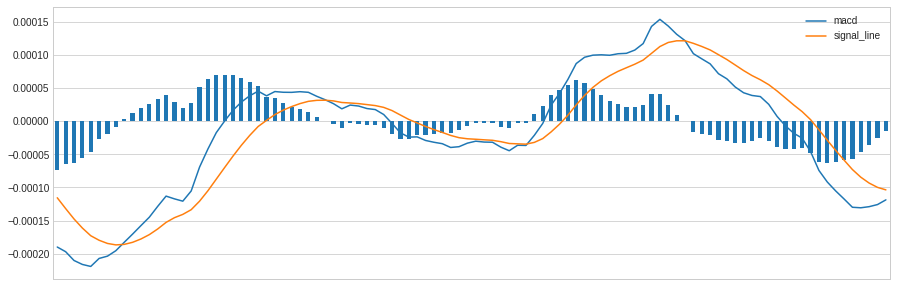

In [24]:
ax = data[['macd', 'signal_line']].iloc[-100:].plot(kind='line', use_index=False, figsize=(15,5))
data['macd_hist'].iloc[-100:].plot(kind='bar', ax=ax, use_index=False, xticks=[])
plt.show()

In [25]:
# # macd cross above signal_line from below --> long
# # macd cross below signal_line from above --> short
# data['macd_signal'] = np.where(np.all([data['macd_hist'] > 0, data['macd'] < 0], axis=0), 1, 
#                                np.where(np.all([data['macd_hist'] < 0, data['macd'] > 0], axis=0), -1, np.nan))
# data['macd_signal'].ffill(inplace=True)

In [26]:
data['macd_signal'] = np.where(data['signal_line'] > 0, 1, np.where(data['signal_line'] < 0, -1, 0))

In [27]:
# data['macd_signal'] = np.where(np.all([data['macd_hist'] > 0, data['macd'] > 0], axis=0), 1, 
#                                np.where(np.all([data['macd_hist'] < 0, data['macd'] < 0], axis=0), -1, 0))
# data['macd_signal'] = np.where(data['signal_line'] > 0, 1, 
#                               np.where(data['signal_line'] < 0, -1, 0))
print('Positions')
print(data['macd_signal'].value_counts())
print('-'*50)
print('Positions change')
print(data['macd_signal'].diff().apply(np.abs).value_counts())
print('-'*50)

Positions
 1    5042
-1    4925
Name: macd_signal, dtype: int64
--------------------------------------------------
Positions change
0.0    9709
2.0     257
Name: macd_signal, dtype: int64
--------------------------------------------------


In [28]:
backtest = IterativeBacktester(data, data['macd_signal'], 'm5')

In [29]:
backtest.backtest()

  0%|          | 0/9966 [00:00<?, ?it/s]

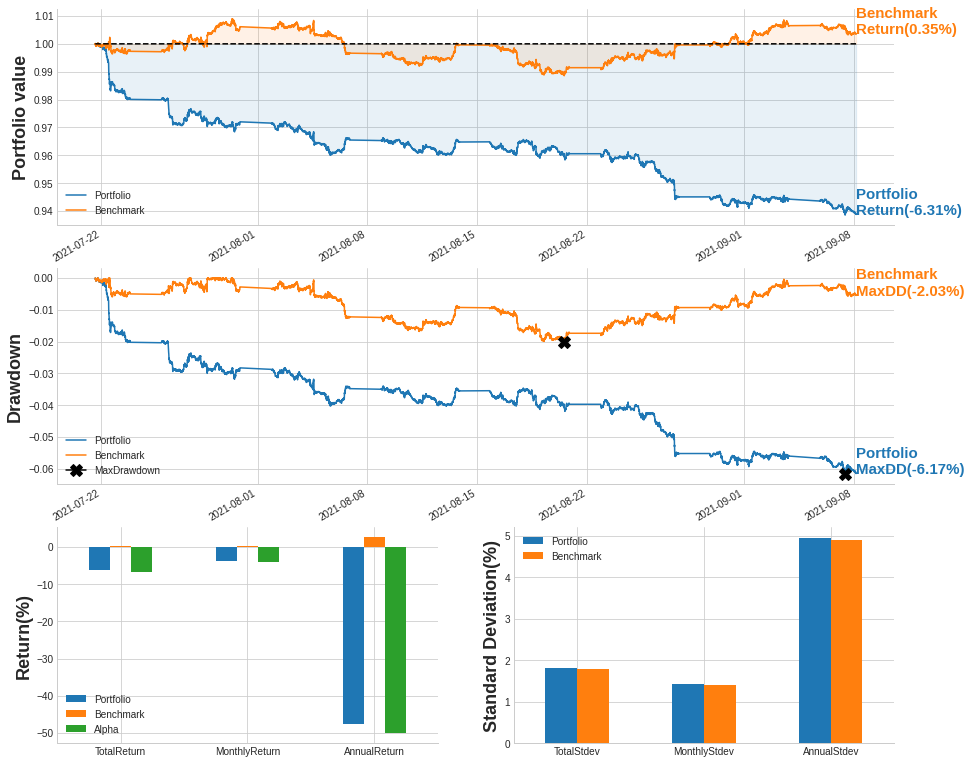

----------------------------------------------------------------------
Data length: |48 days 12:40:00|
Data range from |2021-07-21 15:20:00| to |2021-09-08 04:00:00|
----------------------------------------------------------------------
***** Portfolio Returns in percentage(%) *****
╒═══════════════╤═════════════╤═════════════╤═════════╕
│               │   Portfolio │   Benchmark │   Alpha │
╞═══════════════╪═════════════╪═════════════╪═════════╡
│ TotalReturn   │      -6.314 │       0.352 │  -6.666 │
├───────────────┼─────────────┼─────────────┼─────────┤
│ MonthlyReturn │      -3.903 │       0.218 │  -4.121 │
├───────────────┼─────────────┼─────────────┼─────────┤
│ AnnualReturn  │     -47.488 │       2.647 │ -50.135 │
╘═══════════════╧═════════════╧═════════════╧═════════╛
***** Portfolio Standard Deviation in percentage(%) *****
╒══════════════╤═════════════╤═════════════╕
│              │   Portfolio │   Benchmark │
╞══════════════╪═════════════╪═════════════╡
│ TotalStdev   │   

In [30]:
backtest.results()